In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Netflix\mymoviedb.csv", lineterminator='\n')

In [3]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


# Data Preprocessing Or Data Cleaning

In [4]:
# Check for null values
print(df.isnull().sum().sum())

0


In [5]:
# Check for duplicated rows
print(df.duplicated().sum().sum())

0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [9]:
df['Release_Year'] = df['Release_Date'].dt.year

In [10]:
df['Release_Month'] = df['Release_Date'].dt.strftime('%B')
df.head(1)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,Release_Month
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,December


In [11]:
df = df.drop(['Overview', 'Poster_Url', 'Release_Date'], axis=1)

In [12]:
df['Original_Language'].value_counts().head(10)

data = {'Original_Language': ['en', 'ja', 'es', 'fr', 'ko', 'zh', 'it', 'cn', 'ru', 'de', 'pt']}
language = pd.DataFrame(data)
lang_map = {
    'en': 'English',
    'ja': 'Japanese',
    'es': 'Spanish',
    'fr': 'French',
    'ko': 'Korean',
    'zh': 'Chinese (Mandarin)',
    'it': 'Italian',
    'cn': 'Chinese (Simplified)',
    'ru': 'Russian',
    'de': 'German',
    'pt': 'Portuguese'
}
df['Original_Language'] = language['Original_Language'].replace(lang_map)

In [13]:
df.head(1)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021,December


In [14]:
def catigorize_columns(df, col, labels):
    category = [
        df[col].min(),               
        df[col].quantile(0.25),     
        df[col].quantile(0.50),     
        df[col].quantile(0.75),
        df[col].max() + 0.1 
    ]
    df['Vote_Avg'] = pd.cut(df[col], bins=category, labels=labels, include_lowest=True, duplicates='drop')
    return df

In [15]:
labels = ['Not_Popular', 'Below_Avg', 'Average', 'Popular']

df = catigorize_columns(df, 'Vote_Average', labels)
df.head(2)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Vote_Avg
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021,December,Popular
1,The Batman,3827.658,1151,8.1,Japanese,"Crime, Mystery, Thriller",2022,March,Popular


In [16]:
df.nunique()

Title                9513
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      11
Genre                2337
Release_Year          102
Release_Month          12
Vote_Avg                4
dtype: int64

# EDA (Exploratory Data Analysis)

In [17]:
sns.set_style('whitegrid')

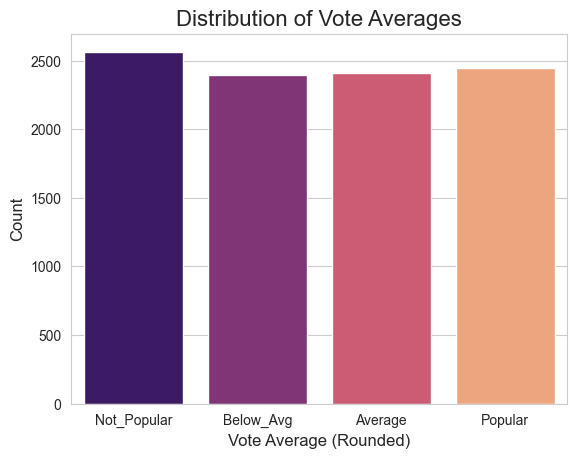

In [18]:
sns.countplot(data=df, x='Vote_Avg', palette='magma')
plt.title('Distribution of Vote Averages', fontsize=16)
plt.xlabel('Vote Average (Rounded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<Axes: >

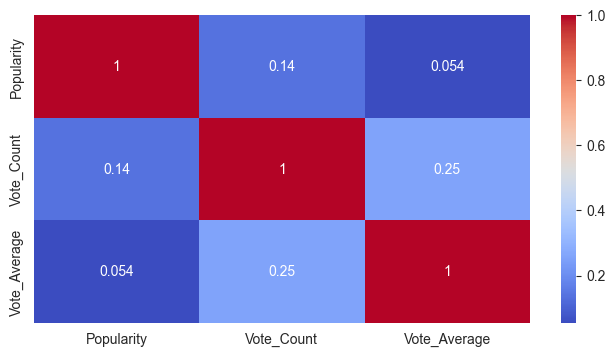

In [19]:
data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<Figure size 1000x500 with 0 Axes>

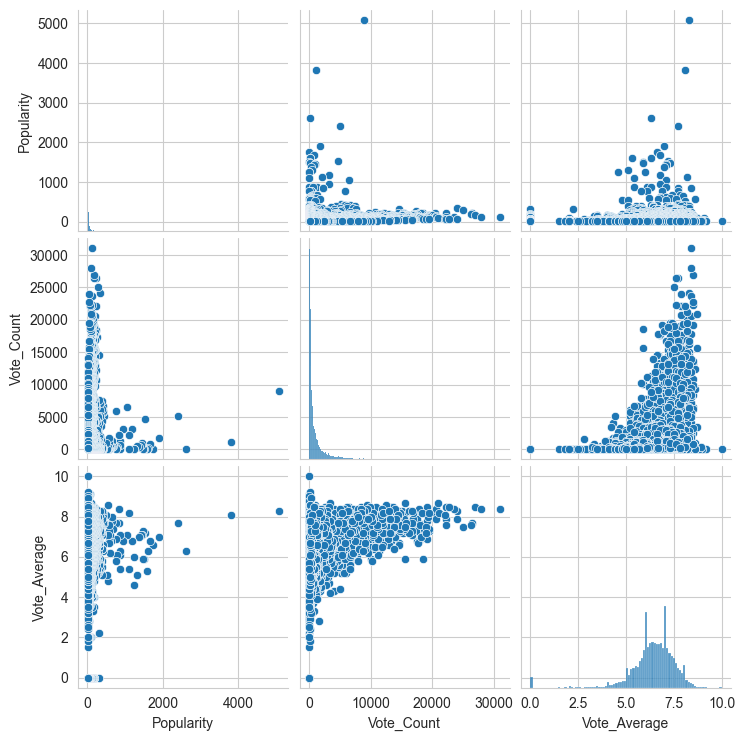

In [20]:
plt.figure(figsize=(10,5))
sns.pairplot(data)
plt.show()

# Data Visualization

## Most frequent genre of movies released on Netflix

In [21]:
genre = df['Genre'].value_counts(sort=True).head(12)
freq_genre = pd.DataFrame(genre)
freq_genre.columns = ['total_freq']
freq_genre = freq_genre.reset_index()
freq_genre.columns = ['genre', 'total_freq']

In [22]:
freq_genre['total_freq'][0]

freq_genre['percentage'] = (freq_genre['total_freq'] / freq_genre['total_freq'].sum()) * 100
freq_genre.head(5)

,genre,total_freq,percentage
0,Drama,466,18.927701
1,Comedy,403,16.368806
2,"Drama, Romance",248,10.073111
3,Horror,238,9.666937
4,"Horror, Thriller",199,8.082859


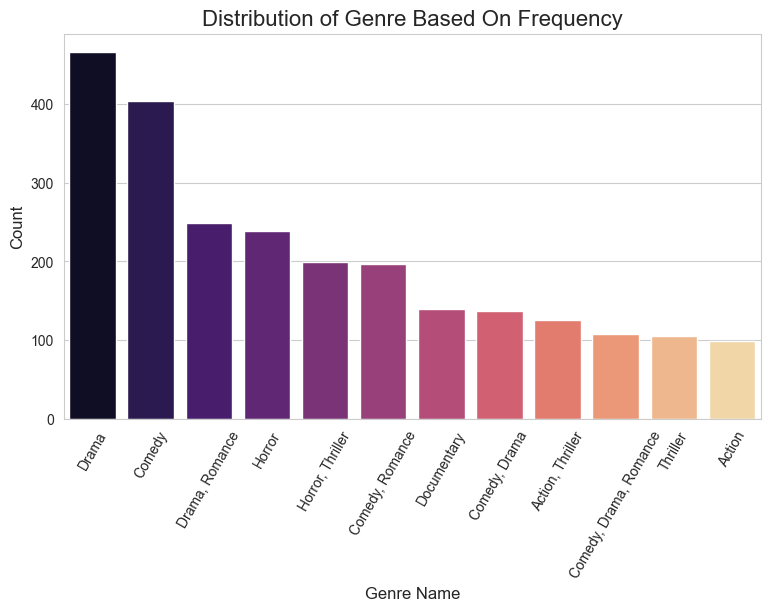

In [23]:
plt.figure(figsize=(9,5))
sns.barplot(data=freq_genre, x='genre', y = 'total_freq', palette="magma")
plt.title('Distribution of Genre Based On Frequency', fontsize=16)
plt.xlabel('Genre Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=60)
plt.show()

## Which has highest votes avg column?

In [24]:
df.head(3)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Vote_Avg
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021,December,Popular
1,The Batman,3827.658,1151,8.1,Japanese,"Crime, Mystery, Thriller",2022,March,Popular
2,No Exit,2618.087,122,6.3,Spanish,Thriller,2022,February,Below_Avg


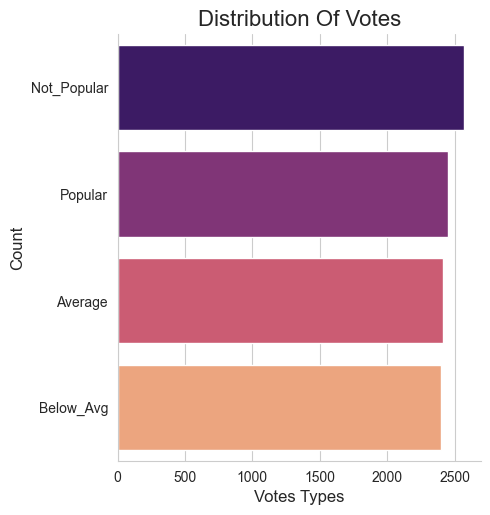

In [25]:
sns.catplot(y='Vote_Avg', data=df, kind='count',
    order=df['Vote_Avg'].value_counts().index, palette='magma')
plt.title('Distribution Of Votes', fontsize=16)
plt.xlabel('Votes Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## What movie got the highest popularity? What's its genre?

In [26]:
df.head(2)

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Vote_Avg
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021,December,Popular
1,The Batman,3827.658,1151,8.1,Japanese,"Crime, Mystery, Thriller",2022,March,Popular


In [27]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Vote_Avg
0,Spider-Man: No Way Home,5083.954,8940,8.3,English,"Action, Adventure, Science Fiction",2021,December,Popular


## What movie got the lowest popularity? What's its genre?

In [28]:
df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Release_Year,Release_Month,Vote_Avg
9825,The United States vs. Billie Holiday,13.354,152,6.7,NaN,"Music, Drama, History",2021,March,Average
9826,Threads,13.354,186,7.8,NaN,"War, Drama, Science Fiction",1984,September,Popular


## Which year has the most filmmed movies?

In [29]:
year = df['Release_Year'].value_counts().head(10)
release_year = pd.DataFrame(year)
release_year = release_year.reset_index()

release_year.columns = ['year', 'count']


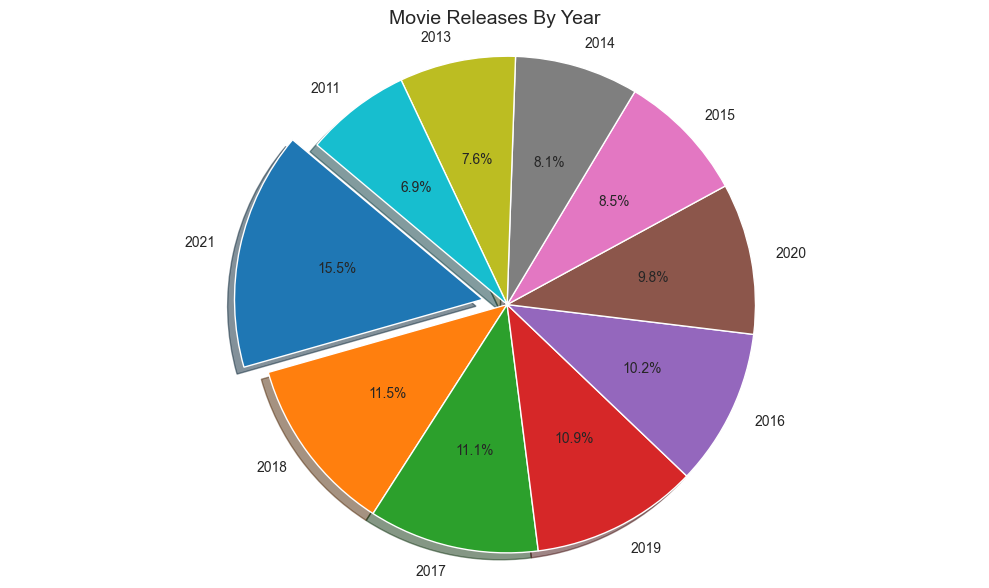

In [30]:
plt.figure(figsize=(10, 6))
explode = [0.1 if i == release_year['count'].max() else 0 for i in release_year['count']]
plt.pie(
    release_year['count'],
    labels=release_year['year'],
    autopct='%1.1f%%',            
    startangle=140,              
    explode=explode,              
    shadow=True                  
)
plt.title('Movie Releases By Year', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Total Movie Count per Release Month by Average Vote

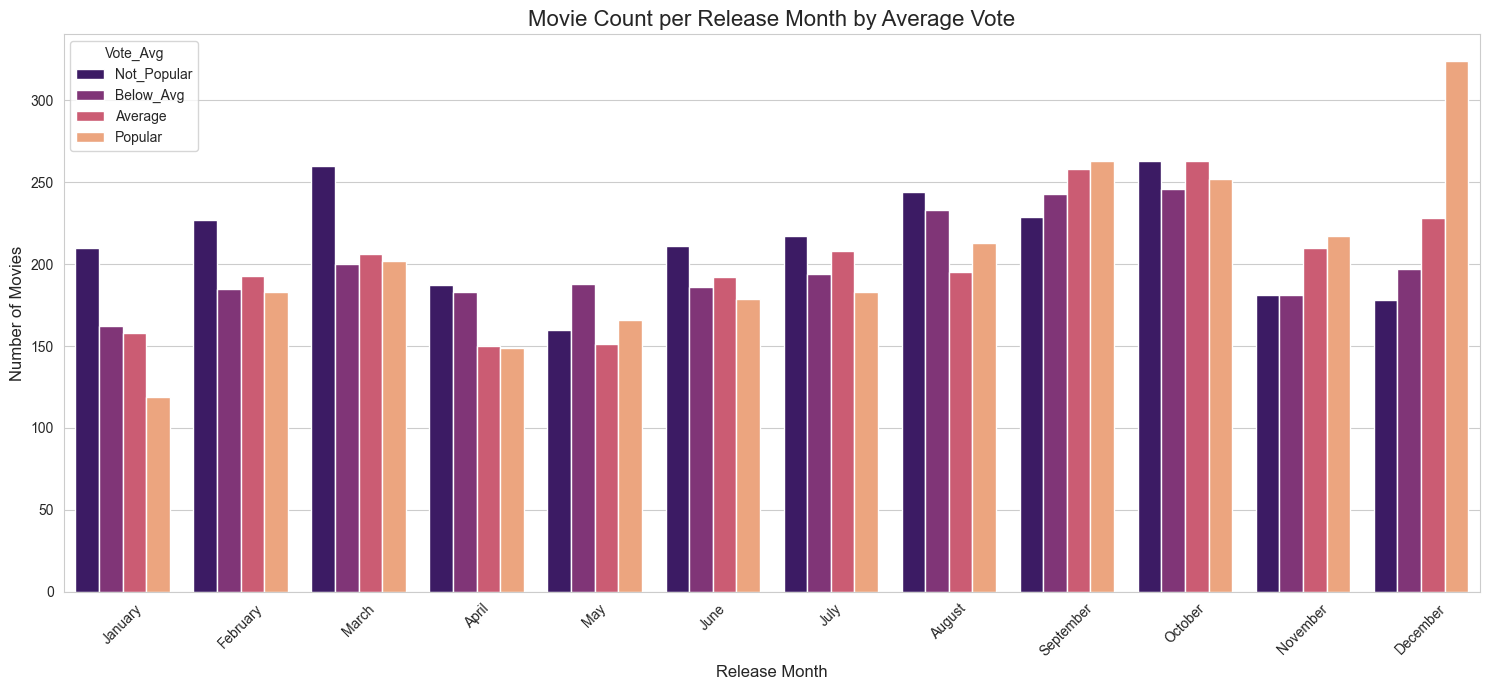

In [31]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Release_Month', hue='Vote_Avg', order=month_order, palette='magma')
plt.title('Movie Count per Release Month by Average Vote', fontsize=16)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 movies based on their popularity release on the Netflix

In [32]:
top_10_movies = df.sort_values(by='Popularity', ascending=False).head(10)
top_10_movies[['Title', 'Popularity']].head(5)

,Title,Popularity
0,Spider-Man: No Way Home,5083.954
1,The Batman,3827.658
2,No Exit,2618.087
3,Encanto,2402.201
4,The King's Man,1895.511


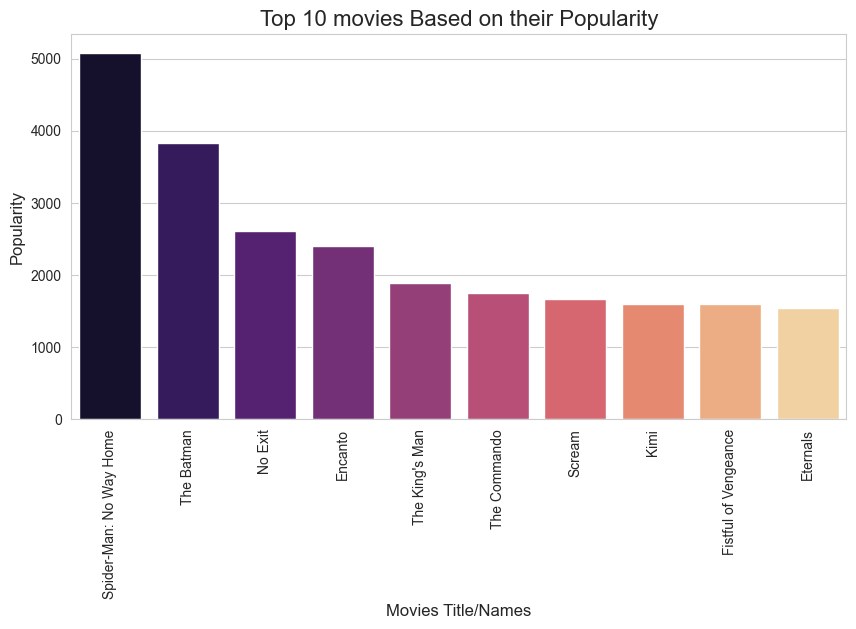

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_movies, x='Title', y='Popularity', palette='magma')
plt.title('Top 10 movies Based on their Popularity', fontsize=16)
plt.xlabel('Movies Title/Names', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q1: What is the most frequent genre in the dataset?
#### Drama genre is the most frequent genre in our dataset and has appeared more than 18.92% of the times among 19 other genres.

### Q2: What genres has highest votes?
#### We have 25.5% of our dataset with not popular vote (2560 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

### Q3: What movie got the highest popularity ? what's its genre?
#### Spider-Man; No Way Home has the highest popularity rate in our dataset and it has genres of Action , Adventure and Sience Fiction .

### Q4: What movie got the lowest popularity ? what's its genre?
#### The united states, thread' has the highest lowest rate in our dataset 'sci-fi' and history'. and it has genres of music , drama 'war'

### Q5: Which year has the most filmmed movies?
#### Year 2020 has the highest filmming rate in our dataset.